In [31]:
import pickle # für Obj serialisation
#import numpy as np
import sys
import matplotlib.pyplot as plt
#sys.path.append('../../attack algorithms/testCode/Event-Based-IM-V2/')
import os
import time
from datetime import datetime
import json
#import csv
from pathlib import Path
import csv
#import DetectionFunctions as func
from typing import List
import numpy as np
import json


In [32]:
#Classes:
# Load
class PacketFile_t:
    sizes: list[int] = []
    timestamps: list[float] = []
    def __init__(self, size: 'list[int]', timestamp: 'list[float]'):
        self.sizes = size
        if(len(timestamp)==0):
            print("TIMESTAMP ZERO")
        self.timestamps = timestamp

class MsgTraceEvFile_t:
    msgTypes: list[str] = []
    msgSizes: list[int] = []
    msgTimestmps: list[float] = []
    def __init__(self, size: 'list[int]',timestamp: 'list[float]', msgType: 'list[str]'):
        self.msgSizes = size
        self.msgTimestmps = timestamp
        self.msgTypes = msgType

class ResultObj_t:
    def __init__(self, TP: float = 0, FP: float = 0, IntervalLen: int = 0):
        self.TP = TP
        self.FP = FP
        self.IntervalLen = IntervalLen

def loadPacketsCSVFile(path: str) -> PacketFile_t:
    packetReader = []
    msgSizes = []
    msgTimestmp = []

    with open(path,newline='') as csvfile:
        packetReader = csv.DictReader(csvfile, delimiter=';',fieldnames=['timestamp','size'])                
        
        for p in packetReader:            
            msgSizes.append(int(p.get('size')))
            msgTimestmp.append(float(p.get('timestamp').replace(',','.')))
    print("Loaded {} packets".format(len(msgSizes)))
    #print("SizeAnfang: {}".format(msgSizes[0]))
    #print("timeAnfang: {}".format(msgTimestmp[0]))
    return PacketFile_t(msgSizes,msgTimestmp)

def loadMsgTracesFromCSVFile(path: str) -> MsgTraceEvFile_t:
    packetReader = []  
    msgTypes = []
    msgSizes = []
    msgTimestmp = []
    with open(path,newline='') as csvfile:
        packetReader = csv.DictReader(csvfile, delimiter=';',fieldnames=['timestamp','size','type'])                
        
        for p in packetReader:
            msgTypes.append(p.get('type'))
            msgSizes.append(int(p.get('size')))
            msgTimestmp.append(float(p.get('timestamp').replace(',','.')))

            
    print("Loaded {} msgEvents".format(len(msgSizes)))
    return MsgTraceEvFile_t(msgSizes,msgTimestmp,msgTypes)
    #print("SizeAnfang: {}".format(packetFile[0].size))



In [33]:



#packetsRootPath = "E:/Datasets_uniPaper/converted/telegram/packets"
#tracesRootPath = "E:/Datasets_uniPaper/converted/telegram/traces"

packetsRootPath = "D://DataUni//converted//telegram//packets_preprocessed"
tracesRootPath = "D://DataUni//converted//telegram//traces_preprocessed"
packetPathRAW = "D://DataUni//converted//telegram//packets"
resultFilePath: str = "./"

# if(len(sys.argv) == 4):
#     print("Using csv path Args")
#     packetsRootPath = sys.argv[1]
#     tracesRootPath = sys.argv[2]
#     resultFilePath = sys.argv[3]
# elif (len(sys.argv) == 2):
#     print("Using resultPath Only")
#     resultFilePath = sys.argv[1]
# elif (len(sys.argv)== 1):
#     print("Using Defaults")
#     resultFilePath = "./"
# else:
#     print ("Usage: DetectionIM.py <processedPacketsFolder> <processedTracesFolder> <resultFilePath>")
#     print ("Or: DetectionIM.py <resultFilePath>")
#     print ("But Received "+str(len(sys.argv))+"Arguments..")
#     for a in sys.argv:
#         print(a)
#     exit()

#-------------------------



packetfileList = os.listdir(packetsRootPath)
packetfileList.sort(key=lambda string: int(string.split('-')[1].replace(".csv",""))) # Das ist so eine hässliche sprache das die lösung jetzt dem entsprechend wird.

tracefileList = os.listdir(tracesRootPath)
tracefileList.sort(key=lambda string: int(string.split('-')[1].replace(".csv",""))) # Das ist so eine hässliche sprache das die lösung jetzt dem entsprechend wird.

packetRawFileList = os.listdir(packetPathRAW)
packetRawFileList.sort(key=lambda string: int(string.split('-')[1].replace(".csv",""))) # Das ist so eine hässliche sprache das die lösung jetzt dem entsprechend wird.




print("fileListCount {}".format(len(packetfileList)))

packetFiles: list[PacketFile_t] = []
packetRAWFiles: list[PacketFile_t] = []
traceFiles: list[MsgTraceEvFile_t] = []



fileListCount 99


In [34]:
if(len(packetfileList) != len(tracefileList)):
    print("Different FilePath list lengths")
else:
    print("Loading Files")
    for i in range(0,len(packetfileList)):    
        pFile = loadPacketsCSVFile(os.path.join(packetsRootPath,packetfileList[i]))
        pRAWFile = loadPacketsCSVFile(os.path.join(packetPathRAW,packetRawFileList[i]))
        tFile = loadMsgTracesFromCSVFile(os.path.join(tracesRootPath,tracefileList[i]))
        #print(len(pFile.timestamp))
        packetFiles.append(pFile)
        traceFiles.append(tFile)
        packetRAWFiles.append(pRAWFile)
        if(i >= 1):
            break
        

Loading Files
Loaded 8 packets
Loaded 3215 packets
Loaded 5 msgEvents
Loaded 7 packets
Loaded 1791 packets
Loaded 4 msgEvents


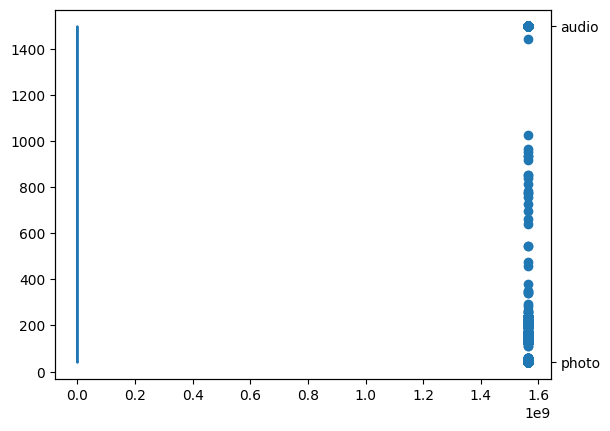

In [35]:
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.scatter(packetRAWFiles[0].timestamps,packetRAWFiles[0].sizes, label="PacketSize")
#plt.plot(traceFiles[0].msgTimestmps,traceFiles[0].msgSizes, label="traceSize")
ax2.plot(traceFiles[0].msgTimestmps,traceFiles[0].msgTypes, label ="Trace Type")

plt.show()